# Data preprocessing for kasumigaura

In [70]:
# import modules
import geopandas as gpd
import urllib.request


## Spatial data

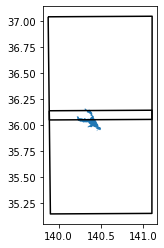

In [66]:
# satellite tile
tile_s2_shp_path = '../rsgis/data/s2/sentinel2_tiles_world/sentinel2_tiles_world.shp'
tile_s2_gdf = gpd.read_file(tile_s2_shp_path)

# kasumigaura
kasumigaura_shp_path = '../rsgis/data/jpn_gsi/jpgis/kasumigaura.shp'
kasumigaura_gdf = gpd.read_file(kasumigaura_shp_path)\
    .to_crs(tile_s2_gdf.crs)
nishiura_gdf = kasumigaura_gdf[kasumigaura_gdf['name'] == 'nishiura']

# filter tile grid
tile_s2_gdf = gpd.sjoin(tile_s2_gdf, nishiura_gdf, how='inner',  op='intersects')

# plot overlay
ax = nishiura_gdf.plot()
tile_s2_gdf.boundary.plot(ax = ax, color=None, edgecolor='k')

In [69]:
tile_s2_gdf['Name']

51107    54SVE
51108    54SVF
Name: Name, dtype: object

## Table data

In [122]:
import zipfile
import pandas as pd
from io import StringIO, BytesIO

from urllib.request import urlopen
wq_tbl31_url = 'http://db.cger.nies.go.jp/gem/inter/GEMS/database/kasumi/data/water/insitu.zip'
wq_tbl41_url = 'http://db.cger.nies.go.jp/gem/inter/GEMS/database/kasumi/data/water/others.zip'
with urlopen(wq_tbl31_url) as response:
    with zipfile.ZipFile(BytesIO(response.read())) as zfile:
        # print(zfile.namelist())
        meta_df = pd.read_csv(zfile.open('insitu/insitu.csv'), parse_dates=True)

with urlopen(wq_tbl41_url) as response:
    with zipfile.ZipFile(BytesIO(response.read())) as zfile:
        data_df = pd.read_csv(zfile.open('others/others.csv'), parse_dates=True)

# Station position
# http://db.cger.nies.go.jp/gem/inter/GEMS/database/kasumi/contents/station.html
coords =  pd.DataFrame(
    {'Station':   [       1,        2,        3,        4,        6,
                          7,         8,       9, 11, 12],
     'Latitude':  [ 36.1492,  36.1377,  36.1217,  36.0892,  36.0819,
                     36.065,  36.0454,  36.0357,  36.0084,  35.9766],
     'Longitude': [140.3249, 140.3404, 140.3775, 140.3982, 140.2204,
                   140.2332, 140.2995, 140.4037, 140.4359, 140.472]})
station_gdf = gpd.GeoDataFrame(
    coords,
    geometry=gpd.points_from_xy(coords.Longitude, coords.Latitude),
    crs='EPSG:4326')

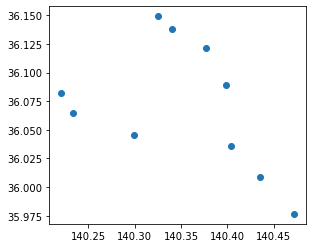

In [107]:
station_gdf.plot()

In [123]:
print(data_df)
print(data_df['Item'].unique())

       Date_Japan  Station                Item  Value   Unit Flag_value
0      1977-04-18        1                  SS   11.2   mg/L        NaN
1      1977-04-18        1                 POC      3  mgC/L        NaN
2      1977-04-18        1                 PON  0.56   mgN/L        NaN
3      1977-04-18        1                 C/N    5.4      -        NaN
4      1977-04-18        1               Depth    2.5      m        NaN
...           ...      ...                 ...    ...    ...        ...
50189  2018-03-12       12                 C/N   5.7       -        NaN
50190  2018-03-12       12  Sonar Depth (ref.)    4.2      m        NaN
50191  2018-03-12       12               Depth    4.3      m        NaN
50192  2018-03-12       12        Transparency     75     cm        NaN
50193  2018-03-12       12                E.C.    204      -        NaN

[50194 rows x 6 columns]
['SS' 'POC' 'PON' 'C/N' 'Depth' 'T-COD' 'Chl-a' 'Transparency' 'E.C.'
 'D-COD' 'Sonar Depth (ref.)']


In [127]:
type(data_df['Date_Japan'][0])

str

In [124]:
chla_df = data_df[data_df['Item'] == 'Chl-a'].reset_index(drop=True)
chla_df

,Date_Japan,Station,Item,Value,Unit,Flag_value
0,1977-05-17,1,Chl-a,9,ug/L,NaN
1,1977-05-17,2,Chl-a,19,ug/L,NaN
2,1977-05-17,3,Chl-a,26,ug/L,NaN
3,1977-05-17,4,Chl-a,35,ug/L,NaN
4,1977-05-17,6,Chl-a,30,ug/L,NaN
...,...,...,...,...,...,...
5177,2018-03-12,7,Chl-a,48,ug/L,NaN
5178,2018-03-12,8,Chl-a,36,ug/L,NaN
5179,2018-03-12,9,Chl-a,35,ug/L,NaN
5180,2018-03-12,11,Chl-a,26,ug/L,NaN


In [125]:
type(chla_df['Date_Japan'][0])

str